# Book scanning - input statistics and facts

In [1]:
from collections import Counter
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np

from loader import Problem, read_input_file

plt.style.use('ggplot')

In [2]:
inputs = list(Path('input/').glob('**/*.txt'))
# [x.name for x in inputs]
instances = [read_input_file(x) for x in inputs]

Reading file input\a_example.txt
 Upper bound: 21
Reading file input\b_read_on.txt
Fact: Every book has the same score
Fact: Every book is unique
 Upper bound: 10_000_000
Reading file input\c_incunabula.txt
 Upper bound: 30_076_415
Better bound: 23_372_244
Reading file input\d_tough_choices.txt
Fact: Every book has the same score
 Upper bound: 5_109_000
Reading file input\e_so_many_books.txt
 Upper bound: 12_548_648
Better bound: 12_457_261
Reading file input\f_libraries_of_the_world.txt
 Upper bound: 40_111_142
Better bound: 39_885_586


In [3]:
def analyze_set(seq: list, title: str):
    s = set(seq)
    if len(s) <= 2:
        sp = repr(s)
    elif len(s) <= 20:
        a, b = min(s), max(s)
        if len(s) == b-a+1:
            sp = f'[from {a} to {b}]'
        else:
            sp = repr(s)
    else:
        sp = '...'
    print(f'\x1b[32m{title:15}\x1b[0m size {len(s):<7_}  {sp}')

In [4]:
def analyze_uniqueness(inst: Problem) -> list[int]:
    """
    For each book, count how many libraries can send it for scanning.
    """
    ctr = Counter()
    for ids in inst.library_book_ids:
        ctr.update(ids)
    # other words: unique-ness, repetitions, duplicates, (?)
    uniqueness = [ctr.get(b, 0)
                  for b in range(inst.B)
                  ]
    # if len(set(uniqueness)) > 2:
    #     plt.hist(uniqueness)
    #     plt.show()
    return uniqueness


def analyze(inst: Problem):
    """Print some facts about this book scanning problem instance."""
    print(f'B = {inst.B:_}')
    print(f'L = {inst.L:_}')
    print(f'D = {inst.D:_}')

    # cardinalities
    analyze_set(inst.book_scores, 'book scores')
    analyze_set(inst.library_efficiency, 'R_i')
    analyze_set(inst.library_signup_time, 'sign-up times')
    analyze_set((len(x) for x in inst.library_book_ids), 'number of books')

    uniqueness = analyze_uniqueness(inst)
    analyze_set(uniqueness, 'num. copies')

## Basic statistics

In [5]:
for fn, inst in zip(inputs[:2], instances[:2]):
    print(f'{fn!s:>40}')
    analyze(inst)
    print('')

                     input\a_example.txt
B = 6
L = 2
D = 7
book scores     size 6        [from 1 to 6]
R_i             size 2        {1, 2}
sign-up times   size 2        {2, 3}
number of books size 2        {4, 5}
num. copies     size 2        {1, 2}

                     input\b_read_on.txt
B = 100_000
L = 100
D = 1_000
book scores     size 1        {100}
R_i             size 1        {1}
sign-up times   size 20       [from 1 to 20]
number of books size 1        {1000}
num. copies     size 1        {1}



In [6]:
# notice (d)
for fn, inst in zip(inputs[2:], instances[2:]):
    print(f'{fn!s:>40}')
    analyze(inst)
    print('')

                  input\c_incunabula.txt
B = 100_000
L = 10_000
D = 100_000
book scores     size 600      ...
R_i             size 9_477    ...
sign-up times   size 991      ...
number of books size 11       [from 10 to 20]
num. copies     size 10       [from 0 to 9]

               input\d_tough_choices.txt
B = 78_600
L = 30_000
D = 30_001
book scores     size 1        {65}
R_i             size 1        {1}
sign-up times   size 1        {2}
number of books size 14       [from 1 to 14]
num. copies     size 2        {2, 3}

               input\e_so_many_books.txt
B = 100_000
L = 1_000
D = 200
book scores     size 250      ...
R_i             size 2        {1, 2}
sign-up times   size 10       [from 1 to 10]
number of books size 644      ...
num. copies     size 18       {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18}

      input\f_libraries_of_the_world.txt
B = 100_000
L = 1_000
D = 700
book scores     size 800      ...
R_i             size 6        [from 5 to 10]
sign-u

In [7]:
def make_six_plots(func):
    fig, ax = plt.subplots(2,3, figsize=(14,6))
    for i, (fn, inst) in enumerate(zip(inputs, instances)):
        a = ax[i // 3][i % 3]
        func(a, inst, title=fn.with_suffix('').name)

    plt.tight_layout()
    # plt.show()

def set_int_ticks_r(ls: list[int]):
    x1, x2 = min(ls), max(ls)
    if x2 - x1 <= 10:
        return range(x1, x2+1)  # tick these
    elif x2 - x1 <= 20:
        # return range(x1, x2+1, 2)
        return [x1, x2]
    # tick None

def set_int_ticks(ls: list[int], cb):
    tx = set_int_ticks_r(ls)
    if tx:
        cb(tx)

## Library stats

In [8]:
# if there is an easy way to make
# this code less repetitive, let me know :)

def plot_libr_M_T(a: plt.Axes, inst: Problem, title=''):
    a.scatter(inst.library_efficiency, inst.library_signup_time)
    a.set_xlabel('M, books per day')  # books / day
    set_int_ticks(inst.library_efficiency, a.set_xticks)
    set_int_ticks(inst.library_signup_time, a.set_yticks)
    a.set_ylabel('T, sign-up time')
    if title:
        a.set_title(title)


def plot_libr_T_M(a: plt.Axes, inst: Problem, title=''):
    sc = a.scatter(inst.library_signup_time, inst.library_efficiency, )
    a.set_xlabel('T, sign-up time')
    a.set_ylabel('M, books per day')  # books / day
    set_int_ticks(inst.library_signup_time, a.set_xticks)
    set_int_ticks(inst.library_efficiency, a.set_yticks)
    if title:
        a.set_title(title)


def plot_libr_N_T(a: plt.Axes, inst: Problem, title=''):
    y = [len(x) for x in inst.library_book_ids]
    a.scatter(inst.library_signup_time, y)
    a.set_xlabel('T, sign-up time')
    a.set_ylabel('N, number of books')
    set_int_ticks(inst.library_signup_time, a.set_xticks)
    set_int_ticks(y, a.set_yticks)
    if title:
        a.set_title(title)


def plot_libr_M_N(a: plt.Axes, inst: Problem, title=''):
    y = [len(x) for x in inst.library_book_ids]
    a.scatter(inst.library_efficiency, y)
    a.set_xlabel('M, books per day')
    a.set_ylabel('N, number of books')
    set_int_ticks(inst.library_efficiency, a.set_xticks)
    set_int_ticks(y, a.set_yticks)
    if title:
        a.set_title(title)

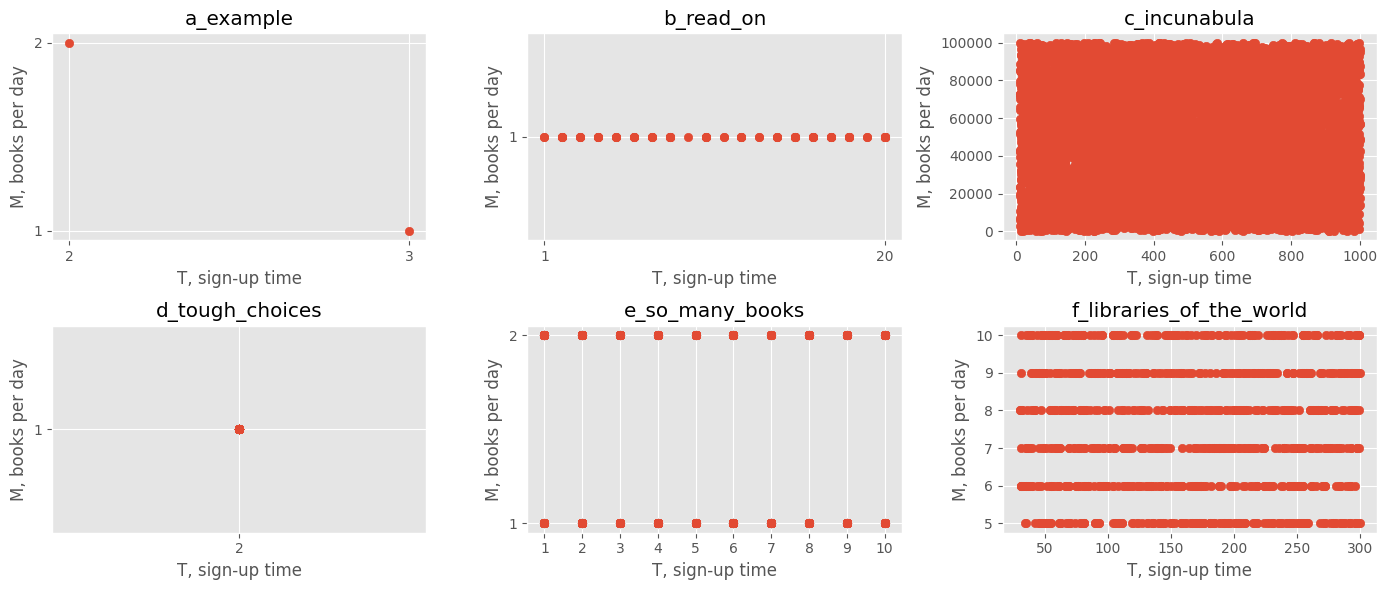

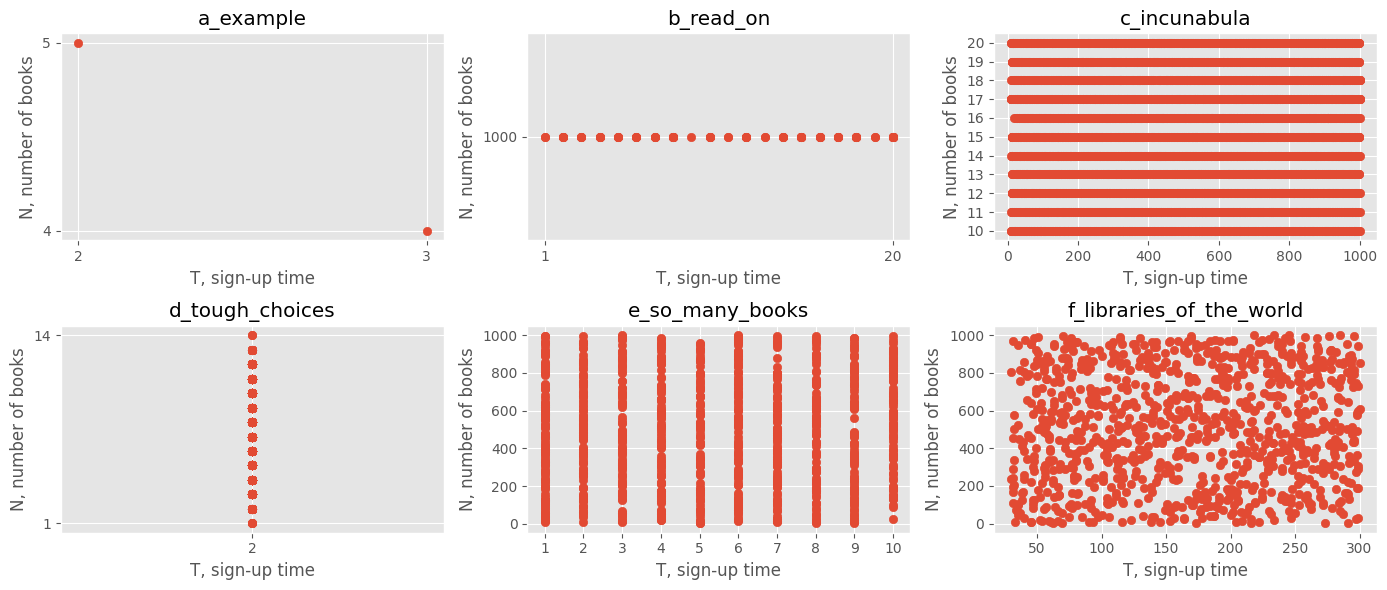

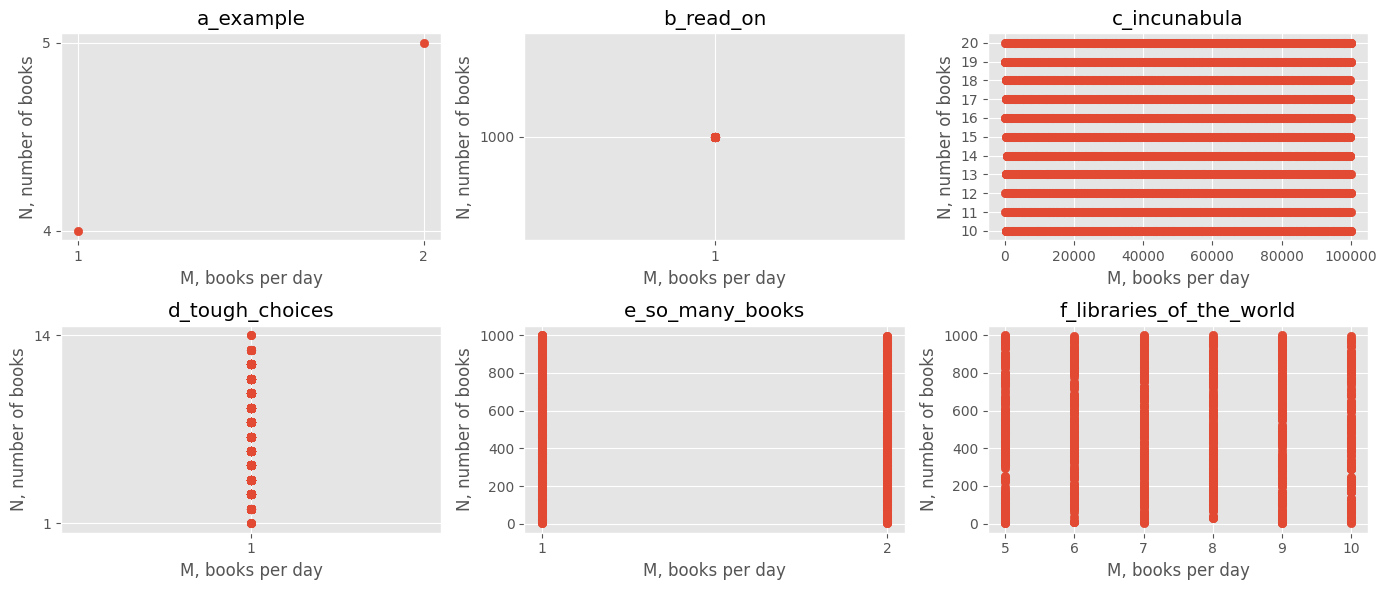

In [9]:
# make_six_plots(plot_libr_M_T)
make_six_plots(plot_libr_T_M)
# plt.savefig('plot_libr_M_T.png');plt.show()
make_six_plots(plot_libr_N_T)
# plt.savefig('plot_libr_T_N.png');plt.show()
make_six_plots(plot_libr_M_N)
# plt.savefig('plot_libr_M_N.png');plt.show()

## Book stats

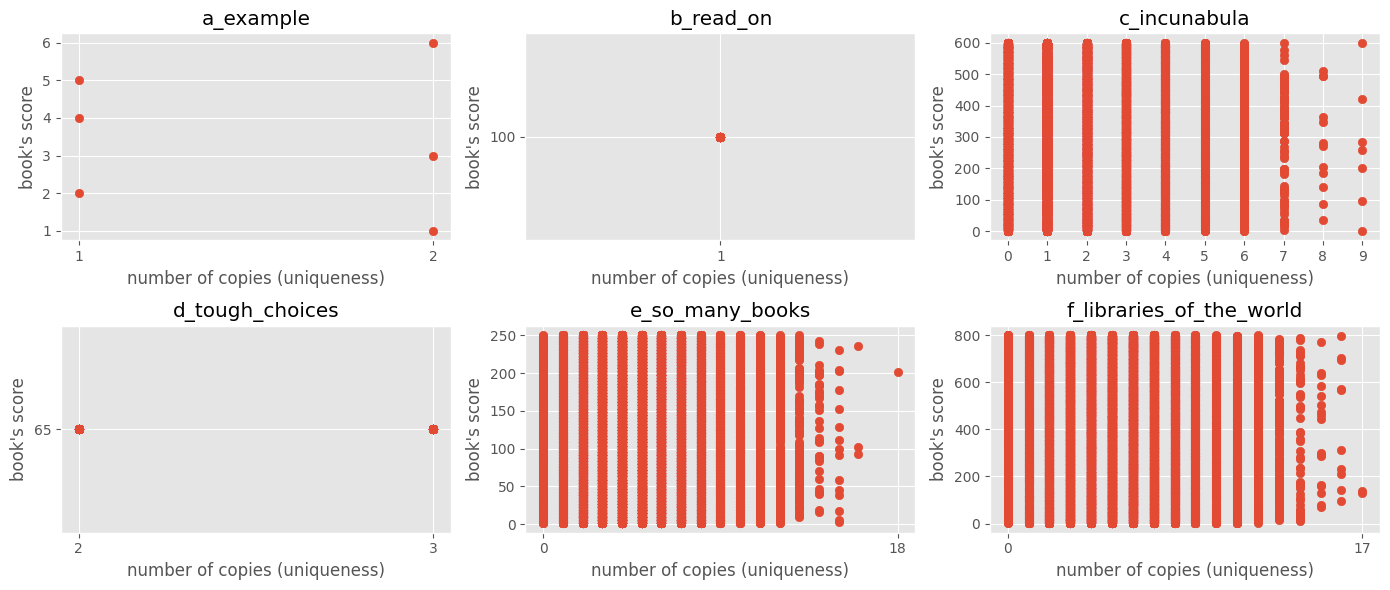

In [10]:
def plot_book_score_copies(a: plt.Axes, inst: Problem, title=''):
    uniqueness = analyze_uniqueness(inst)

    # plot uniqueness vs score
    a.scatter(uniqueness, inst.book_scores, )
    a.set_xlabel('number of copies (uniqueness)')
    a.set_ylabel('book\'s score')
    set_int_ticks(uniqueness, a.set_xticks)
    set_int_ticks(inst.book_scores, a.set_yticks)
    if title:
        a.set_title(title)

make_six_plots(plot_book_score_copies)
# plt.savefig('plot_book_D_S.png')

## for each instance

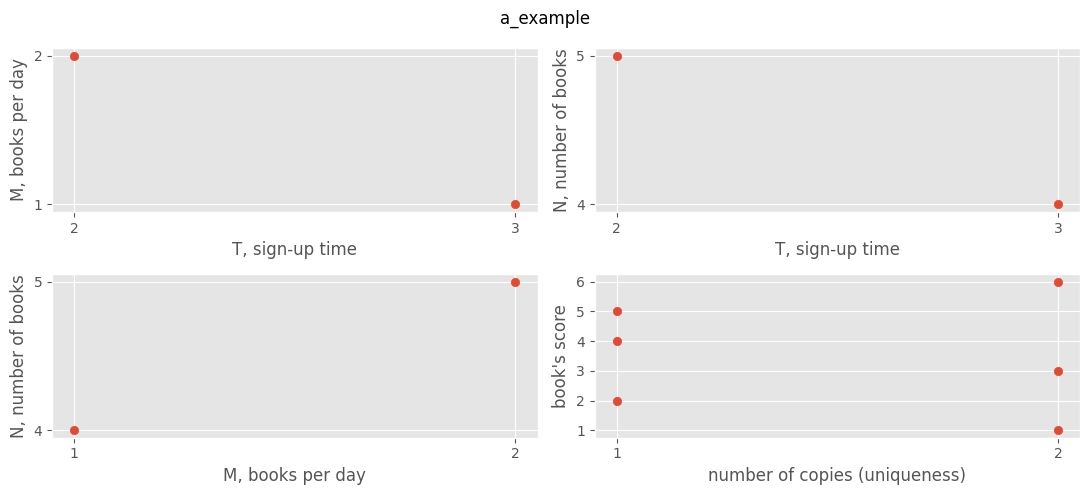

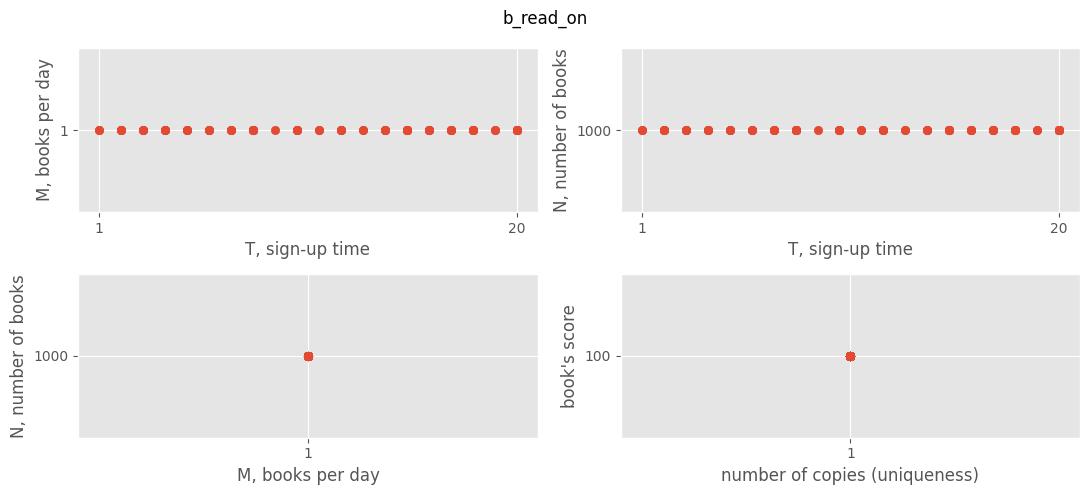

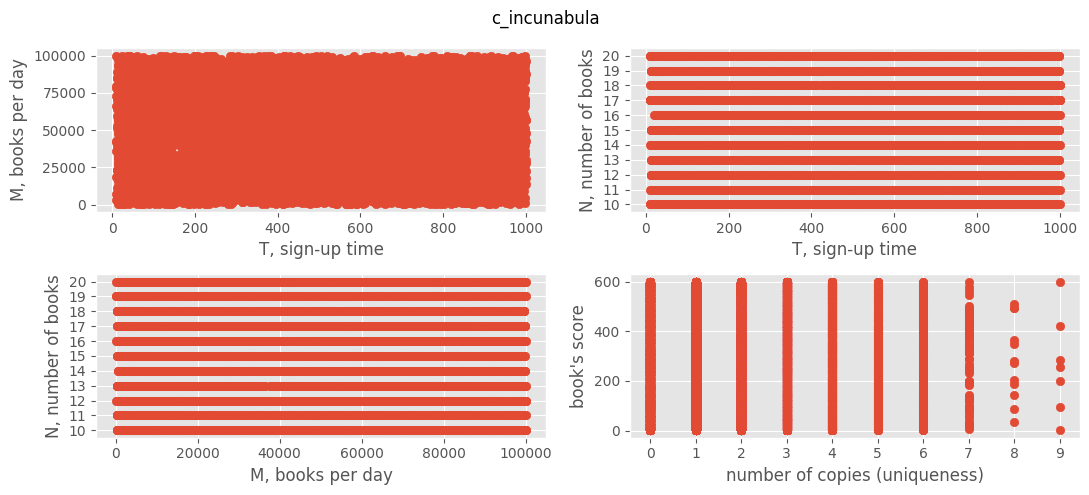

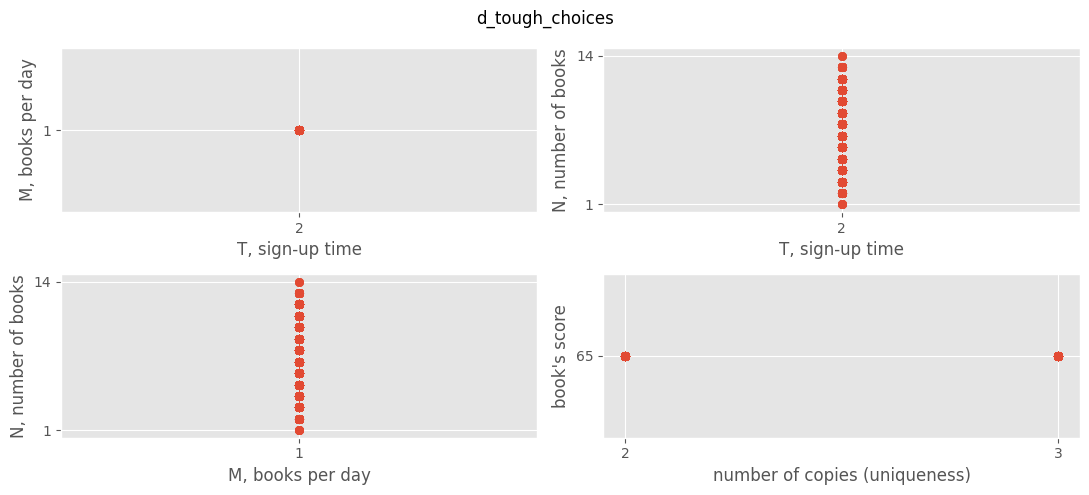

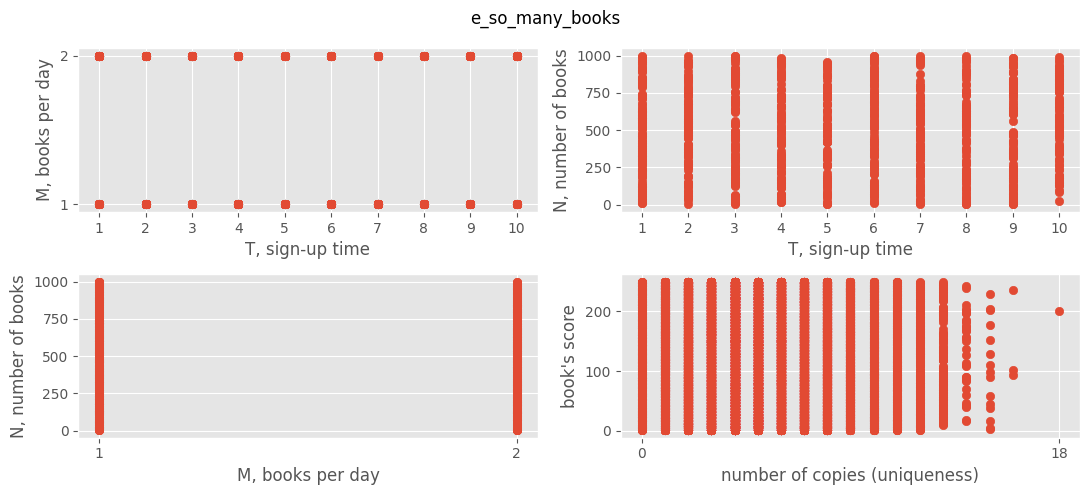

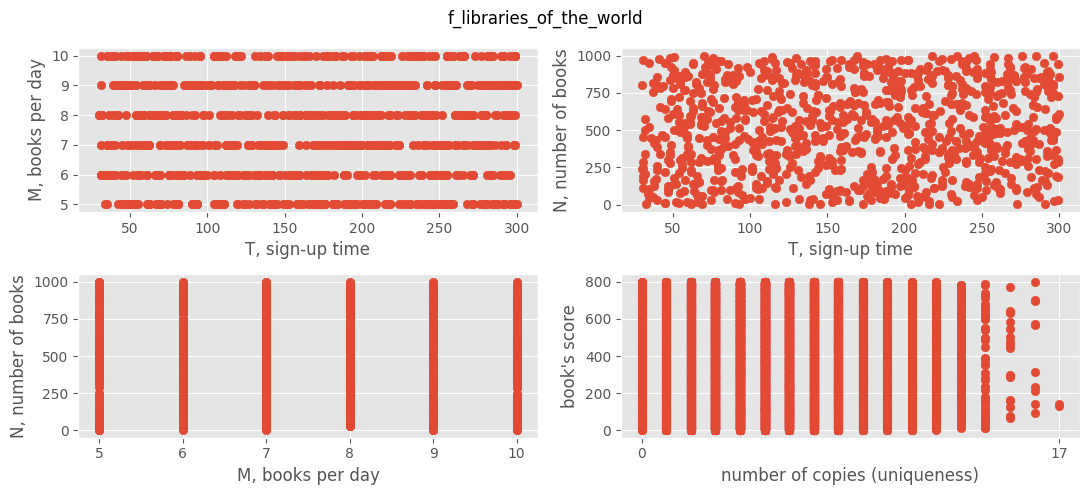

In [11]:
def graphs_for_inst(fn: Path, inst):
    fig, ax = plt.subplots(2,2, figsize=(11, 5))
    # a = ax[i // 3][i % 3]
    fn = fn.with_suffix('')
    fig.suptitle(fn.with_suffix('').name)
    plot_libr_T_M(ax[0][0], inst)
    plot_libr_N_T(ax[0][1], inst)
    plot_libr_M_N(ax[1][0], inst)
    # ax[1][1].remove()  # disappear
    plot_book_score_copies(ax[1][1], inst)

    plt.tight_layout()

# graphs_for_inst(inputs[0], instances[0])
for fn, inst in zip(inputs, instances):
    graphs_for_inst(fn, inst)
    plt.savefig(f'instance-{fn.with_suffix("").name}.png')
    plt.savefig(f'instance-{fn.with_suffix("").name}.pdf')
    plt.show()